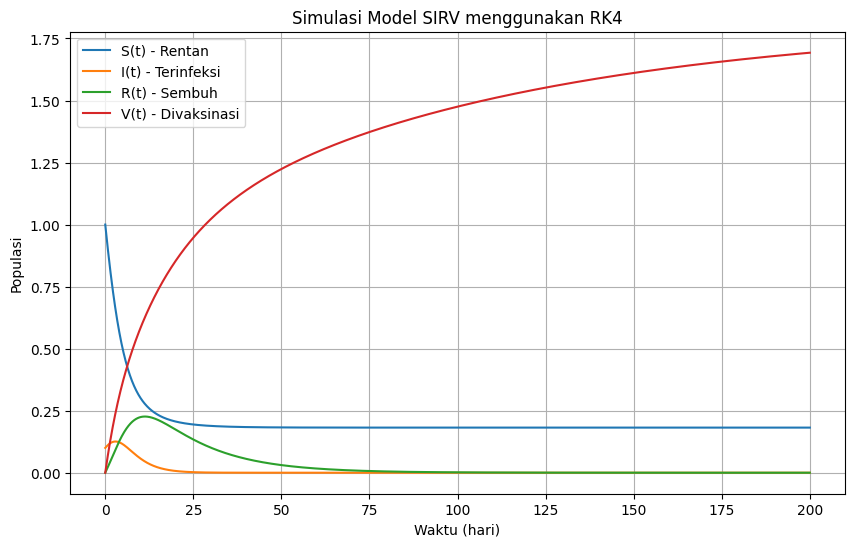


--- Tabel Hasil Simulasi Numerik SIRV (Agregasi Bulanan) ---
                Date     S     I     R  V
 March 01 - 30, 2022 0.189 0.001 0.101  1
 March 31 - 29, 2022 0.182 0.000 0.017  1
 April 30 - 29, 2022 0.182 0.000 0.003  1
   May 30 - 28, 2022 0.182 0.000 0.000  2
  June 29 - 28, 2022 0.182 0.000 0.000  2
  July 29 - 27, 2022 0.182 0.000 0.000  2
August 28 - 26, 2022 0.182 0.000 0.000  2
               TOTAL     1 0.001 0.121 10
             Average 0.183 0.000 0.017  1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, timedelta

# --- 1. Parameter dan Setup ---
alpha, beta, psi, gamma = 0.5, 0.3, 0.1, 0.05
mu, mu_c, k = 0.01, 0.02, 0.02
t0, t_end, h = 0, 200, 0.1
t = np.arange(t0, t_end + h, h)
S0, I0, R0, V0 = 1, 0.1, 0, 0

def f(S, I, R, V):
    dS = k - mu * S - alpha * S * I - psi * S
    dI = alpha * S * I - (mu + mu_c + beta) * I
    dR = beta * I - (mu + gamma) * R
    dV = gamma * R + psi * S - mu * V
    return np.array([dS, dI, dR, dV])

# --- 2. Metode Runge–Kutta Orde 4 (RK4) ---
S_list, I_list, R_list, V_list = [S0], [I0], [R0], [V0]
S, I, R, V = S0, I0, R0, V0
for _ in t[1:]:
    k1 = f(S, I, R, V)
    k2 = f(S + 0.5 * h * k1[0], I + 0.5 * h * k1[1], R + 0.5 * h * k1[2], V + 0.5 * h * k1[3])
    k3 = f(S + 0.5 * h * k2[0], I + 0.5 * h * k2[1], R + 0.5 * h * k2[2], V + 0.5 * h * k2[3])
    k4 = f(S + h * k3[0], I + h * k3[1], R + h * k3[2], V + h * k3[3])

    delta = h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    S, I, R, V = S + delta[0], I + delta[1], R + delta[2], V + delta[3]

    S_list.extend([S]), I_list.extend([I]), R_list.extend([R]), V_list.extend([V])

# --- 3. Agregasi Data Bulanan untuk Tabel ---
start_date = date(2022, 3, 1)
data_for_table = []
current_day_sim, days_in_period = 0, 30

while current_day_sim < t_end:
    end_day_sim = min(current_day_sim + days_in_period, t_end)
    end_index = int(end_day_sim / h)

    if end_index < len(S_list):
        current_month_start = start_date + timedelta(days=int(current_day_sim))
        period_end_date = current_month_start + timedelta(days=days_in_period - 1)
        date_str = f"{current_month_start.strftime('%B %d')} - {period_end_date.strftime('%d, %Y')}"

        data_for_table.append({
            'Date': date_str,
            'S': S_list[end_index],
            'I': I_list[end_index],
            'R': R_list[end_index],
            'V': V_list[end_index]
        })

    current_day_sim += days_in_period
    if current_day_sim >= t_end: break # Hentikan loop

df_table = pd.DataFrame(data_for_table)

# --- 4. Perhitungan Total dan Average ---
total_row = df_table[['S', 'I', 'R', 'V']].sum().to_frame().T.assign(Date='TOTAL')
average_row = df_table[['S', 'I', 'R', 'V']].mean().to_frame().T.assign(Date='Average')
df_final_table = pd.concat([df_table, total_row, average_row], ignore_index=True)

# Format Angka (hanya string pada akhirnya)
for col in ['S', 'I', 'R', 'V']:
    df_final_table[col] = df_final_table[col].apply(lambda x: f"{x:,.0f}" if x >= 1 else f"{x:,.3f}")

# --- 5. Visualisasi Hasil (Grafik) ---
plt.figure(figsize=(10, 6))
plt.plot(t, S_list, label="S(t) - Rentan")
plt.plot(t, I_list, label="I(t) - Terinfeksi")
plt.plot(t, R_list, label="R(t) - Sembuh")
plt.plot(t, V_list, label="V(t) - Divaksinasi")
plt.xlabel("Waktu (hari)"), plt.ylabel("Populasi"), plt.title("Simulasi Model SIRV menggunakan RK4")
plt.legend(), plt.grid(), plt.show()

# --- 6. Tampilkan Tabel ---
print("\n--- Tabel Hasil Simulasi Numerik SIRV (Agregasi Bulanan) ---")
print(df_final_table.to_string(index=False))